In [21]:
#!pip install tensorflow matplotlib



In [15]:
# =====================================
# Title: CNN Model for Handwritten Digit Classification (MNIST Dataset - CSV version)
# =====================================

# a. Import required packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# a. Loading and Preprocessing the Image Data
# =====================================

# Load your CSV files (update paths if needed)
train_df = pd.read_csv(r"C:\Users\\OneDrive\Desktop\DL\DLDataset\MNISTAssn2&3\mnist_train.csv")
test_df  = pd.read_csv(r"C:\Users\\OneDrive\Desktop\DL\DLDataset\MNISTAssn2&3\mnist_test.csv")


Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


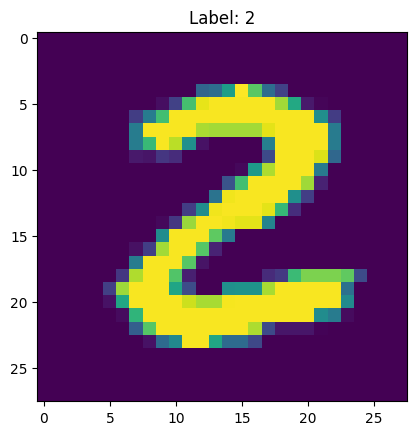

In [16]:
# Separate features (pixels) and labels
y_train = train_df['label'].values
x_train = train_df.drop('label', axis=1).values

y_test = test_df['label'].values
x_test = test_df.drop('label', axis=1).values

# Reshape to 28x28x1 (since grayscale images have 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Display dataset details
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

# Optional: display one image
plt.imshow(x_train[25])
plt.title(f"Label: {y_train[25]}")
plt.show()

In [17]:
# =====================================
# b. Defining the CNN Model Architecture
# =====================================

model = keras.Sequential([
    # Convolution + Pooling layers
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    # Flatten + Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0–9)
])

# Display summary
model.summary()


C:\ProgramData\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# =====================================
# c. Training the Model
# =====================================

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# =====================================
# d. Estimating the Model's Performance
# =====================================

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/10
422/422 - 16s - 37ms/step - accuracy: 0.9204 - loss: 0.2622 - val_accuracy: 0.9778 - val_loss: 0.0713
Epoch 2/10
422/422 - 12s - 27ms/step - accuracy: 0.9765 - loss: 0.0771 - val_accuracy: 0.9870 - val_loss: 0.0464
Epoch 3/10
422/422 - 11s - 27ms/step - accuracy: 0.9824 - loss: 0.0560 - val_accuracy: 0.9873 - val_loss: 0.0386
Epoch 4/10
422/422 - 11s - 27ms/step - accuracy: 0.9872 - loss: 0.0423 - val_accuracy: 0.9887 - val_loss: 0.0388
Epoch 5/10
422/422 - 12s - 27ms/step - accuracy: 0.9887 - loss: 0.0356 - val_accuracy: 0.9918 - val_loss: 0.0361
Epoch 6/10
422/422 - 13s - 31ms/step - accuracy: 0.9902 - loss: 0.0308 - val_accuracy: 0.9910 - val_loss: 0.0334
Epoch 7/10
422/422 - 12s - 29ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9923 - val_loss: 0.0324
Epoch 8/10
422/422 - 20s - 47ms/step - accuracy: 0.9932 - loss: 0.0213 - val_accuracy: 0.9900 - val_loss: 0.0405
Epoch 9/10
422/422 - 12s - 29ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9927 - 

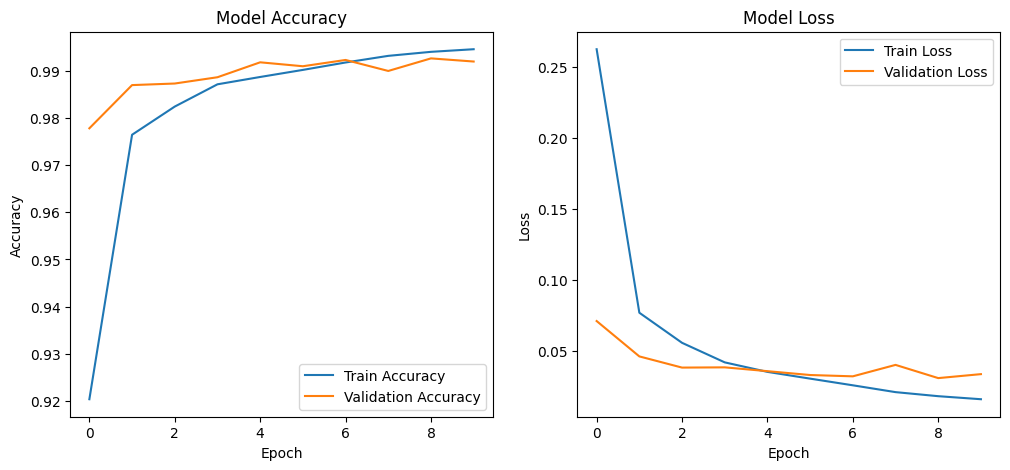

In [19]:
# =====================================
# e. Plot Training Loss and Accuracy
# =====================================

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


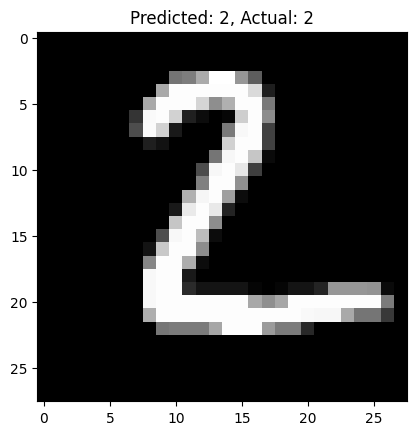

In [20]:
# =====================================
# f. Display Prediction Example
# =====================================

predictions = model.predict(x_test)
index = 1

plt.imshow(x_test[index], cmap='grey')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.show()